In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [4]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\admin\AppData\Local\Temp\ipykernel_13144\697499095.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [5]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [6]:
series_1 = series.diff().dropna()

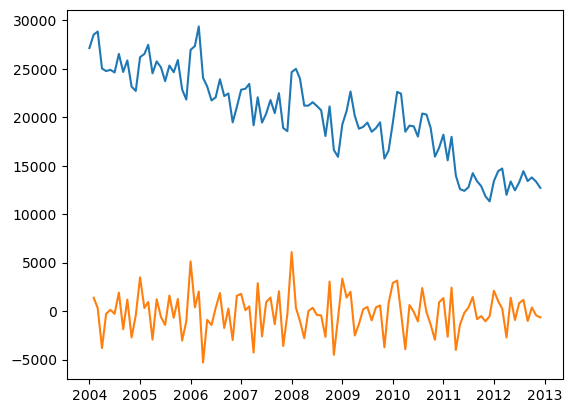

In [7]:
plt.plot(series)
plt.plot(series_1)

In [8]:
series_2 = series_1.diff().dropna()

In [11]:
perform_adf_test(series_2)

ADF Statistic: -7.162321
p-value: 0.000000


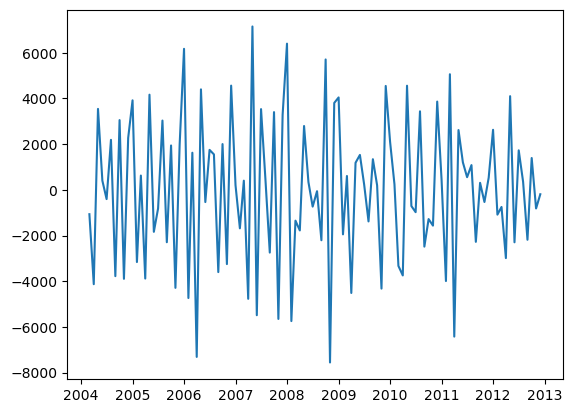

In [9]:
plt.plot(series_2)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


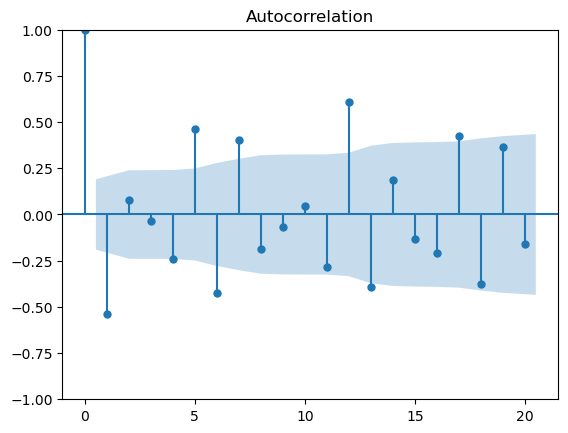

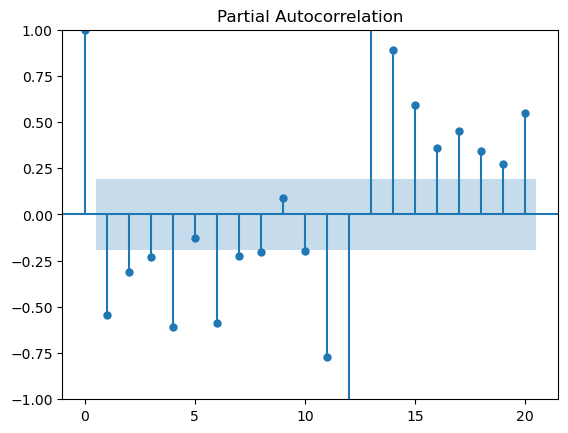

In [10]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [12]:
ar_orders = [1, 2, 3]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [31]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')


ARMA(1,1) - AIC: 1952.1517900016415, BIC: 1962.8803149101384
ARMA(1,2) - AIC: 1946.3054247589625, BIC: 1959.7160808945837
ARMA(2,1) - AIC: 1946.705069374759, BIC: 1960.1157255103801
ARMA(2,2) - AIC: 1945.8903510419527, BIC: 1961.9831384046981


In [40]:
train_end = datetime(2011,12,1)
test_end = datetime(2012,12,1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [44]:
model = ARIMA(train_data, order=(2,1,2))

In [45]:
model_fit = model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -849.847
Date:                Tue, 19 Mar 2024   AIC                           1711.693
Time:                        21:14:06   BIC                           1726.953
Sample:                    03-01-2004   HQIC                          1717.857
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1432      6.956     -0.308      0.758     -15.777      11.491
ar.L1         -1.0569      0.132     -8.015      0.000      -1.315      -0.798
ar.L2         -0.3115      0.105     -2.974      0.0

In [47]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [50]:
pred_end_date

Timestamp('2012-12-01 00:00:00', freq='MS')

In [51]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [52]:
predictions

2012-01-01    197.086589
2012-02-01    181.064481
2012-03-01   -257.832771
2012-04-01    211.033029
2012-05-01   -147.810314
2012-06-01     85.414605
2012-07-01    -49.312204
2012-08-01     20.438025
2012-09-01    -11.317562
2012-10-01      0.519729
2012-11-01     -2.100125
2012-12-01     -3.018207
Freq: MS, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Sales')

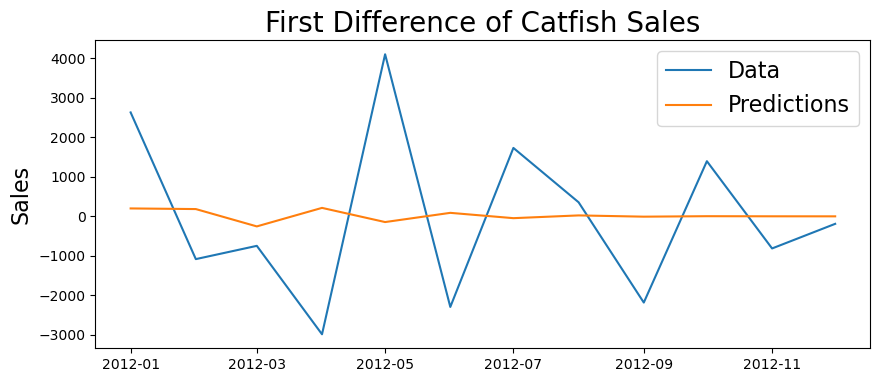

In [54]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [14]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values


In [17]:
actual_values = pd.Series([100, 105, 110, 115, 120])

# Sample differenced data (assuming first order differencing)
differenced_data = pd.Series([5, 5, 5, 5])

# Sample model forecast (assuming one-step-ahead forecast)


In [18]:
actual_values = pd.Series([100, 105, 110, 115, 120])
actual_values.iloc[-1]

120

In [19]:
invert_diff(actual_values.iloc[-1],differenced_data)

[125, 130, 135, 140]